# AIM
To create a model to predict breast cancer using ANN
Dataset has been taken from kaggle
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

#Understanding the data
## About Breast Cancer Wisconsin (Diagnostic) Data Set
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [0]:
#! pip install -q kaggle

In [0]:
#! mkdir ~/.kaggle



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
#use this to add API key of kaggle to colab

'''from google.colab import files

files.upload()'''

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theroyalraj","key":"76295c92a3f80d0ae88f9ac9afd008b1"}'}

In [0]:
#! cp kaggle.json ~/.kaggle/

In [0]:
#!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 18.1MB/s]


In [0]:
!mkdir breast_cancer

mkdir: cannot create directory ‘breast_cancer’: File exists


In [0]:
#! unzip breast-cancer-wisconsin-data.zip -d breast_cancer

Archive:  breast-cancer-wisconsin-data.zip
  inflating: breast_cancer/data.csv  


In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('./breast_cancer/data.csv')
del data['Unnamed: 32']

In [0]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Now that we have prepared data, we will import Keras and its packages.**

In [0]:
#!pip install tensorflow

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [0]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [0]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/150
512/512 [==============================] - 0s 392us/step - loss: 0.6928 - accuracy: 0.6211
Epoch 2/150
512/512 [==============================] - 0s 29us/step - loss: 0.6917 - accuracy: 0.6309
Epoch 3/150
512/512 [==============================] - 0s 26us/step - loss: 0.6902 - accuracy: 0.6328
Epoch 4/150
512/512 [==============================] - 0s 29us/step - loss: 0.6878 - accuracy: 0.6914
Epoch 5/150
512/512 [==============================] - 0s 30us/step - loss: 0.6836 - accuracy: 0.7871
Epoch 6/150
512/512 [==============================] - 0s 29us/step - loss: 0.6766 - accuracy: 0.8887
Epoch 7/150
512/512 [==============================] - 0s 26us/step - loss: 0.6639 - accuracy: 0.9277
Epoch 8/150
512/512 [==============================] - 0s 26us/step - loss: 0.6449 - accuracy: 0.9414
Epoch 9/150
512/512 [==============================] - 0s 30us/step - loss: 0.6154 - accuracy: 0.9473
Epoch 10/150
512/512 [==============================] - 0s 26us/step - loss: 0.57

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 100.0%


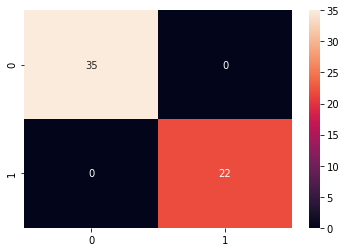

In [0]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [0]:


keras.backend.clear_session()